# NAS Parallel Benchmarks

This notebook shows results of running NAS parallel benchmarks with gem5art. Only two cpu models are used in these runs. KVM cpu is used with class A, B, C and D of NPB, while atomic cpu is used with only class A of NPB.

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt
import os

In [2]:
datadir = '/run/user/1000/gvfs/sftp:host=amarillo.cs.ucdavis.edu/fasthome/aakahlow/npb_tests/results/run_npb/'

In [3]:
Benchmarks = sorted(os.listdir(datadir))
print(Benchmarks)

['bt.x', 'cg.x', 'ep.x', 'ft.x', 'is.x', 'lu.x', 'mg.x', 'sp.x']


In [4]:
# function to extract stats
def gem5GetStat(filename, stat):
    filename = os.path.join(datadir, '', filename, 'stats.txt').replace('\\','/')
    with open(filename) as f:
        r = f.read()
        if len(r) < 10: return 0.0
        start = r.find(stat) + len(stat) + 1
        end = r.find('#', start)
        return float(r[start:end])

In [5]:
Cpus = ['kvm','atomic']
Cores = ['1', '4']
Classes = ['A','B','C','D']

In [70]:
rows = []

for bm in Benchmarks:
    for clas in Classes:
        for cpu in Cpus:
            for core in Cores:                
                if cpu == 'atomic' and clas != 'A':
                    continue
                file_path = '{}/{}/{}/{}/{}/'.format(datadir,bm,clas,cpu,core)
                
                rows.append([bm,clas,cpu,core,
                     gem5GetStat(file_path, 'sim_ticks')/333, #1000
                     gem5GetStat(file_path, 'sim_insts')/1000000,
                     gem5GetStat(file_path, 'sim_ops'),
                     gem5GetStat(file_path, 'sim_ticks')/1e12/60,
                     gem5GetStat(file_path, 'host_seconds')/60])             


df = pd.DataFrame(rows, columns=['benchmark','class','cpu','core','cycles', 'instructions', 'ops', 'sim_time', 'host_time'])

df['host_hours'] = df['host_time']/60
df['ipc'] = df['instructions']/df['cycles']
df['cpi'] = df['cycles']/df['instructions']
df['opc'] = df['ops']/df['cycles']
                     
#print(df)

In [67]:
def doplot(cpu,core,stat,norm=False):
    plt.figure()
    i = 0
    if cpu == 'atomic':
        classes = ['A']
    else:
        classes = Classes
    
    for bm in Benchmarks:
        for j,clas in enumerate(classes):
            d = df[(df['benchmark']==bm) & (df['class']==clas) & (df['cpu']==cpu) & (df['core']==core)]
            plt.bar(i, d[stat].iloc[0], color='C'+str(j))
            i = i+1
        i = i+1
                    
    for i,clas in enumerate(classes):
        plt.bar(0,0,color='C'+str(i), label=clas)
    plt.xticks(np.arange(len(Benchmarks))*(len(Classes)+1)+1.5, Benchmarks, rotation=40, ha='right')

# Simulation Statistics

## Simulated Time (Seconds) 

<IPython.core.display.Javascript object>


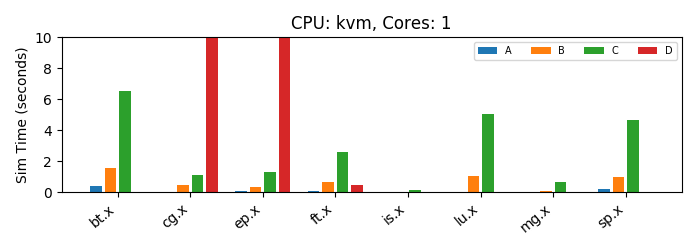

<IPython.core.display.Javascript object>


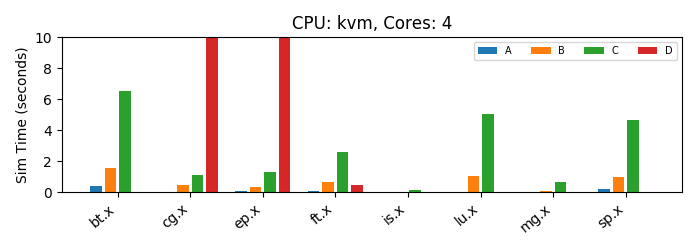

<IPython.core.display.Javascript object>


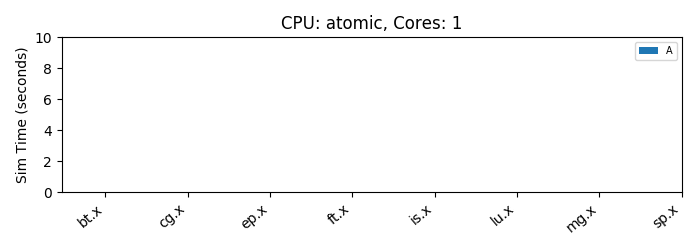

<IPython.core.display.Javascript object>


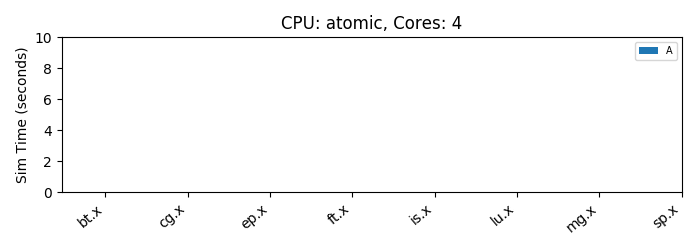

In [71]:
#plt.rcParams["figure.figsize"] = fig_size
for cpu in ['kvm','atomic']:
    for cores in ['1','4']:#,'4']:
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 7
        fig_size[1] = 2.5
        doplot(cpu,core,'sim_time')
        plt.ylabel('Sim Time (seconds)')
        plt.ylim(ymax = 10, ymin = 0)
        plt.legend(loc=0, ncol=4, prop={'size': 7})
        plt.title('CPU: {}, Cores: {}'.format(cpu,cores))
        plt.tight_layout()


## Number of Instructions (in millions)

<IPython.core.display.Javascript object>


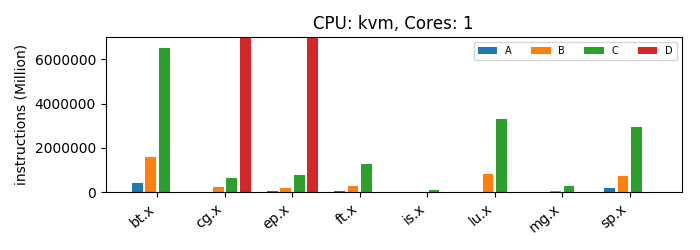

<IPython.core.display.Javascript object>


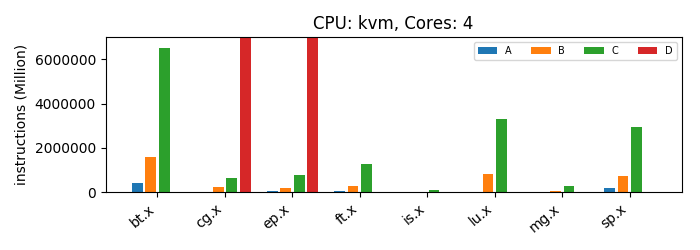

<IPython.core.display.Javascript object>


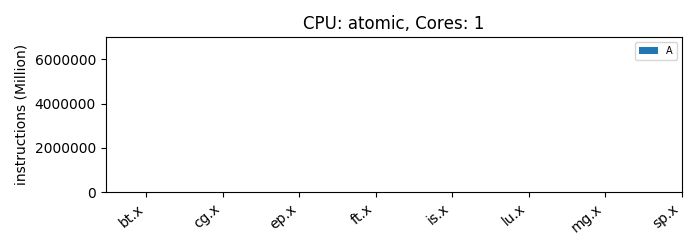

<IPython.core.display.Javascript object>


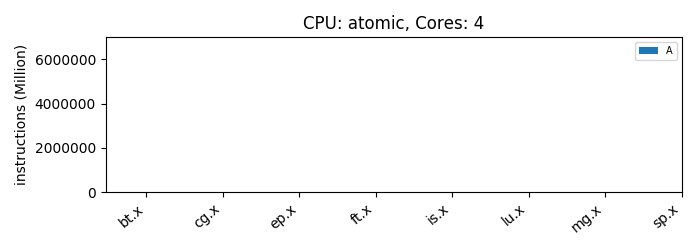

In [73]:
#plt.rcParams["figure.figsize"] = fig_size
for cpu in ['kvm','atomic']:
    for cores in ['1','4']:#,'4']:
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 7
        fig_size[1] = 2.5
        doplot(cpu,core,'instructions')
        plt.ylabel('instructions (Million)')
        plt.ylim(ymax = 7000000, ymin = 0)
        plt.legend(loc=0, ncol=4, prop={'size': 7})
        plt.title('CPU: {}, Cores: {}'.format(cpu,cores))
        plt.tight_layout()

## Host Time (minutes)

<IPython.core.display.Javascript object>


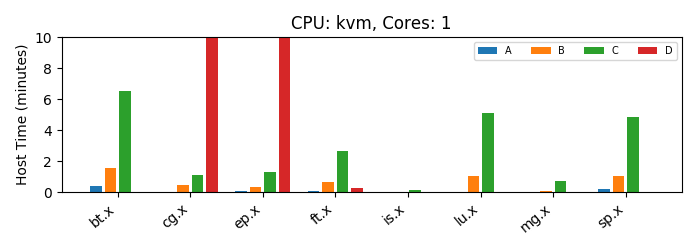

<IPython.core.display.Javascript object>


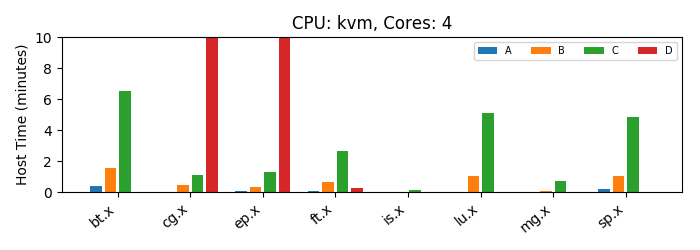

<IPython.core.display.Javascript object>


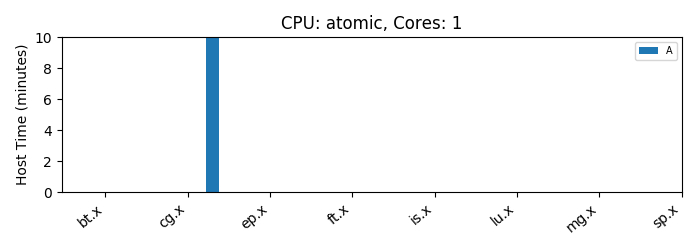

<IPython.core.display.Javascript object>


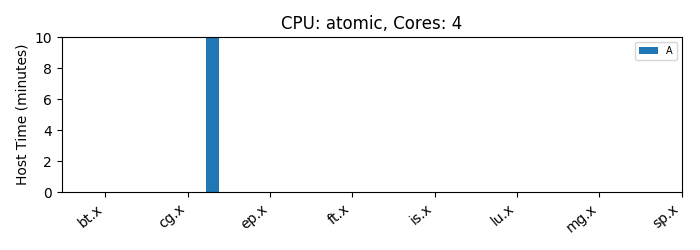

In [76]:
#plt.rcParams["figure.figsize"] = fig_size
for cpu in ['kvm','atomic']:
    for cores in ['1','4']:#,'4']:
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 7
        fig_size[1] = 2.5
        doplot(cpu,core,'host_time')
        plt.ylabel('Host Time (minutes)')
        plt.ylim(ymax = 10, ymin = 0)
        plt.legend(loc=0, ncol=4, prop={'size': 7})
        plt.title('CPU: {}, Cores: {}'.format(cpu,cores))
        plt.tight_layout()